In [117]:
import pandas as pd
import numpy as np
import pickle
import time 
import os
from datetime import datetime
from operator import itemgetter
import time

# 需要什么读取什么不要一次性全都读取了，影响程序速度

data_folder_path = '../'
raw_data_path = "../raw_data"
storage_path = "../database_storage"
daily_path = "../daily"
DTBS_path = os.path.join(storage_path, "DTBS.pkl")
DCBS_path = os.path.join(storage_path, "DCBS.pkl")

with open('database_ByZCG\\DCBS_DataFrame.pkl', 'rb') as f: 
    DCBS_DataFrame = pickle.load(f)
    
with open('database_ByZCG\\DTBS_DataFrame.pkl', 'rb') as f:  
    DTBS_DataFrame = pickle.load(f)

# 只提取A区中存活的转债的时间序列信息
A_DF = DTBS_DataFrame['A']
A_DF = A_DF[A_DF['ia']==1].copy()
B_DF = DTBS_DataFrame['B'].copy()
C_DF = DTBS_DataFrame['C'].copy()
D_DF = DTBS_DataFrame['D'].copy()

In [118]:
print(C_DF)

            date        zi      nlmy      jchg        gt      ysjs        dz  \
0     2017-01-03  284.1168  3,388.74  3,350.08  2,610.63  3,623.94  3,085.68   
1     2017-01-04  285.8681  3,423.82  3,405.95  2,642.13  3,670.89  3,125.47   
2     2017-01-05  286.0264  3,421.90  3,411.20  2,645.93  3,688.33  3,119.82   
3     2017-01-06  285.6805  3,410.66  3,394.32  2,656.73  3,665.62  3,081.86   
4     2017-01-09  287.0139  3,399.36  3,410.87  2,680.69  3,677.00  3,092.85   
...          ...       ...       ...       ...       ...       ...       ...   
1621  2023-09-01    407.65       NaN       NaN       NaN       NaN       NaN   
1622  2023-09-04    409.68       NaN       NaN       NaN       NaN       NaN   
1623  2023-09-05    408.87       NaN       NaN       NaN       NaN       NaN   
1624  2023-09-06    408.42       NaN       NaN       NaN       NaN       NaN   
1625  2023-09-07    403.99       NaN       NaN       NaN       NaN       NaN   

          jydq      spyl      fzfs  ...

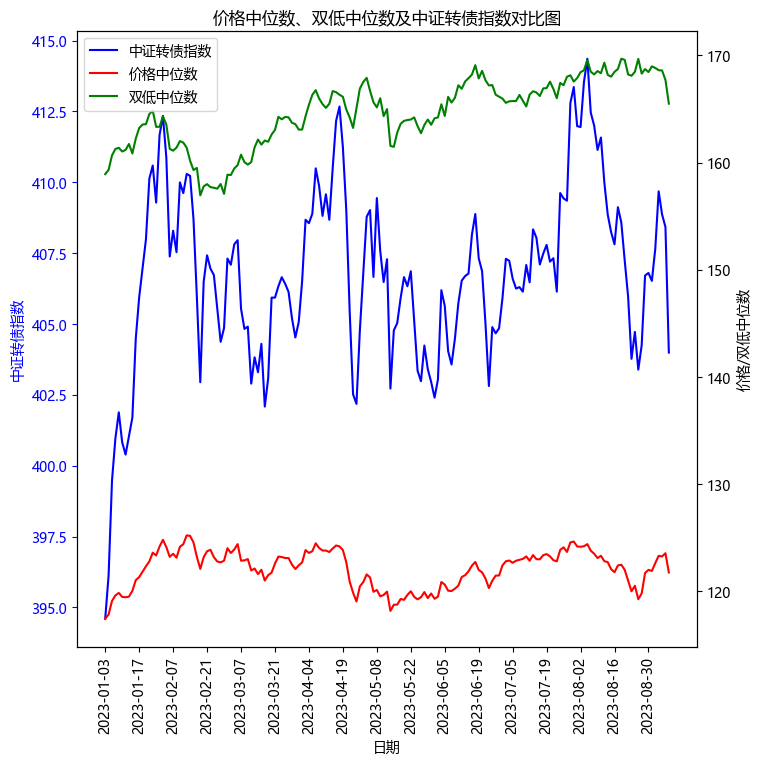

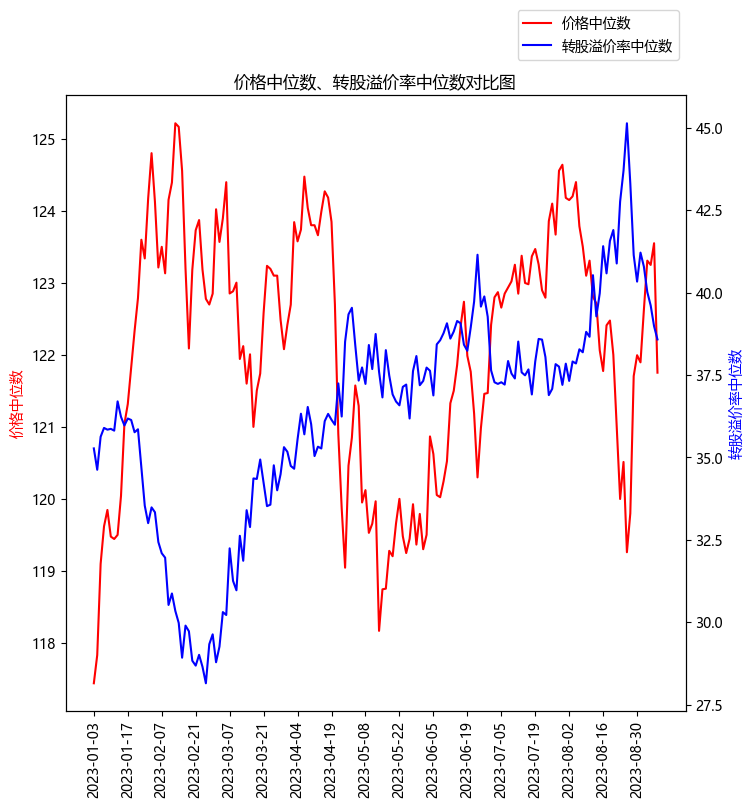

<Figure size 800x800 with 0 Axes>

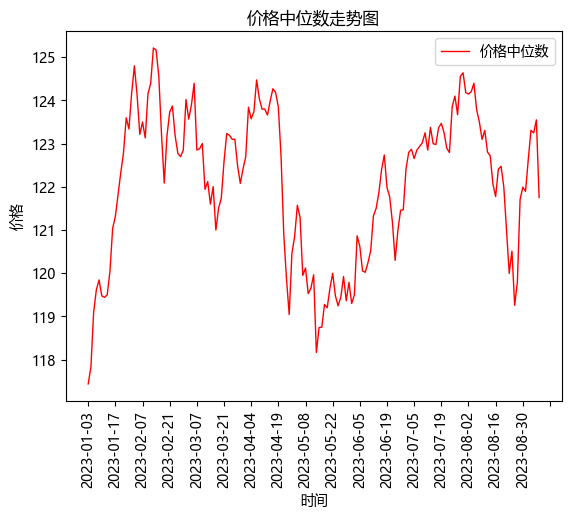

6.720919415092091


In [121]:
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from math import sqrt,log
from numpy import std

# 解决中文乱码问题
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei'] # 指定默认字体：解决plot不能显示中文问题
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

start_day = '2023-01-01'
a_df = A_DF[A_DF['date']>=start_day].copy()
c_df = C_DF[C_DF['date']>=start_day][['date','zi', 'gz2000']].copy()

x = list(C_DF[C_DF['date']>=start_day]['date'])
dp_median_values = a_df.groupby('date')['dp'].median()
dl_median_values = a_df.groupby('date')['dl'].median()
cpr_median_values = a_df.groupby('date')['cpr'].median()

zi_values = c_df.set_index('date')['zi']
gz2000_values = c_df.set_index('date')['gz2000']


# 创建一个包含多个子图的画布
fig, ax1 = plt.subplots(figsize=(8, 8))

# 绘制第一个数据集到第一个坐标轴
ax1.plot(x, zi_values, 'b-', label='中证转债指数')
ax1.set_xlabel('日期')
ax1.set_ylabel('中证转债指数', color='blue')
# 对x轴进行翻转，竖向显示
plt.xticks(rotation=90, fontsize=10)
ax1.tick_params('y', colors='blue')


# 创建第二个坐标轴，共享X轴
ax2 = ax1.twinx()

# 绘制第二个数据集到第二个坐标轴
ax2.plot(x, dp_median_values, 'r-', label='价格中位数')
ax2.set_ylabel('价格/双低中位数', color='black')
ax2.tick_params('y', colors='black')


# 在同一张图上添加第三个数据集
plt.plot(x, dl_median_values, 'g-', label='双低中位数')

# 调整x轴刻度显示
new_xticks = x[::10]  # 自定义新的刻度位置
new_xticklabels = x[::10]  # 自定义新的刻度标签
plt.xticks(new_xticks, new_xticklabels)


# 显示图例和标题
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.legend(lines1 + lines2, labels1 + labels2)

plt.title('价格中位数、双低中位数及中证转债指数对比图')

# 显示图形
plt.show()




# 创建一个包含多个子图的画布
fig, ax1 = plt.subplots(figsize=(8, 8))

# 绘制第一个数据集到第一个坐标轴
ax1.plot(x, dp_median_values, 'r-', label='价格中位数')
ax1.set_ylabel('价格中位数', color='red')
ax1.tick_params('y', colors='red')

# 对x轴进行翻转，竖向显示
plt.xticks(rotation=90, fontsize=10)
ax1.tick_params('y', colors='black')


# 创建第二个坐标轴，共享X轴
ax2 = ax1.twinx()

# 绘制第二个数据集到第二个坐标轴
ax2.plot(x, cpr_median_values, 'b-', label='转股溢价率中位数')
ax2.set_xlabel('日期')
ax2.set_ylabel('转股溢价率中位数', color='blue')


# 调整x轴刻度显示
new_xticks = x[::10]  # 自定义新的刻度位置
new_xticklabels = x[::10]  # 自定义新的刻度标签
plt.xticks(new_xticks, new_xticklabels)


# 显示图例和标题
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.legend(lines1 + lines2, labels1 + labels2, loc='upper right', bbox_to_anchor=(1.0, 1.15))

plt.title('价格中位数、转股溢价率中位数对比图')

# 显示图形
plt.show()


# 绘制单周净收益率曲线图
plt.figure(figsize=(8,8))
fig, ax = plt.subplots(1, 1)
plt.plot(x, dp_median_values, color='red', label="价格中位数",linewidth=1)
plt.xlabel("时间")
plt.ylabel("价格")
plt.title('价格中位数走势图')
# 图例显示
plt.legend()
# 设置打印的密度
# tick_spacing = 1
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))

# 设置显示字体的大小
plt.tick_params(axis='both', labelsize=10)
# 对x轴进行翻转，竖向显示
plt.xticks(rotation=90, fontsize=10)
# 显示图像
plt.show()

print(dp_add_dl_median_values.std())

In [109]:
df = A_DF[(A_DF['date']=='2023-09-06') & (A_DF['dp']>=150)].copy()
output_df = pd.merge(df[['bond_code', 'date', 'cpr', 'dp', 'bl', 'trt' ,'ytm','yl','dl','redeem_count']],B_DF[['bond_code','cn','sc','sn','cat1','cat2']],on='bond_code',how='left')
output_df.rename(columns={'date' : '日期',
                          'bond_code' : '可转债代码',
                          'dp' : '价格（收盘价全价）',
                          'cpr' : '转股溢价率',
                                'dl' : '双低',
                                'change':'涨跌幅',
                                'sn' : '正股名称',
                                'bl' : '债券余额（亿）',
                                'yl' : '剩余期限（年）',
                                'trt' : '换手率',
                                'ytm' : '到期收益率',
                         'cat1' : '申万一级',
                         'cat2' : '申万二级',
                         'cn' : '转债名称',
                         'sc' : '正股代码',
                         'redeem_count' : '强赎信息（精确，从集思录导出的）'},inplace=True)
output_df.to_excel('20230906收盘价大于150的转债.xlsx',index=False)

In [116]:
df = A_DF[A_DF['date']>='2023-08-30'].copy()
df.sort_values(by = ['bond_code','date'], inplace=True, ascending=[True,True])
df['lastday_dp'] = df.groupby('bond_code')['dp'].shift(1)
df['last5day_dp'] = df.groupby('bond_code')['dp'].shift(5)
df['change'] = df['dp'] / df['lastday_dp'] - 1
df['weekly_change'] = df['dp'] / df['last5day_dp'] - 1
output_df = df[df['date']=='2023-09-06'][['bond_code','date','dp','lastday_dp','last5day_dp','change','weekly_change']].copy()
output_df.to_excel('匹配用途.xlsx',index=False)